In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()

## NEW Work ##

In [ ]:
# Copied imports from above

import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

In [ ]:

# Task 2 - Map of sky in a certain area

# TO get void locations
# awd = pd.read_csv("data/voids.csv", skiprows = 0).rename(columns = {"ras":"amf_ra", "decs":"amf_dec"})

# TO get ALL cluster locations (union3)
awd = pd.read_csv("data/union3.csv", skiprows = 0)

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

# 1)  z > 1, Zou HSC
awd[(awd.z > 1) & (awd.cat == 3)]

In [ ]:
# 2)  z > 1, WH22

awd[(awd.z > 1) & (awd.cat == 4)]

In [ ]:
# 3)  0.6 < z < 1, Zou DESI

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat == 2)]

In [ ]:
# 4)  0.6 < z < 1, Zou DES + WH22 
# DES alone doesn't have enough

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat.isin([1, 4]))]

In [ ]:
# 5)  0.05 < z < 0.6, AMF + WH22

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat.isin([0, 4]))]

In [ ]:
# 6)  0.05 < z < 0.6, Zou DESI

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat == 2)]

In [ ]:
# Vertical
ver = (((90*60)/10)*(5/6))-1
ver

In [ ]:
# Horiztonal
hor = (180*60)/10-1
hor

In [ ]:
ver * hor

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm

# galactic coordinates
glon = []
glat = []
for lon in tqdm(np.linspace(180,360,1079)):
    for lat in np.linspace(15,90,449):
        if (lat >= -15) & (lat <= 15):
            continue
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

In [ ]:
# Algorithm Results

cluster_map = pd.read_csv("output/Locations/C2_wA/random_scan_fs.csv")
# cluster_map = cluster_map[cluster_map["clusterp"] > 0.85]

import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False, coord = ["C", "G"])
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],s=1,vmin=0, vmax=1)

## Comparisons ##

In [ ]:
compare1 = pd.read_csv("output/Locations/C1_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/cluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.4, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.4, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=100, color = "blue", alpha = 0.4, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()


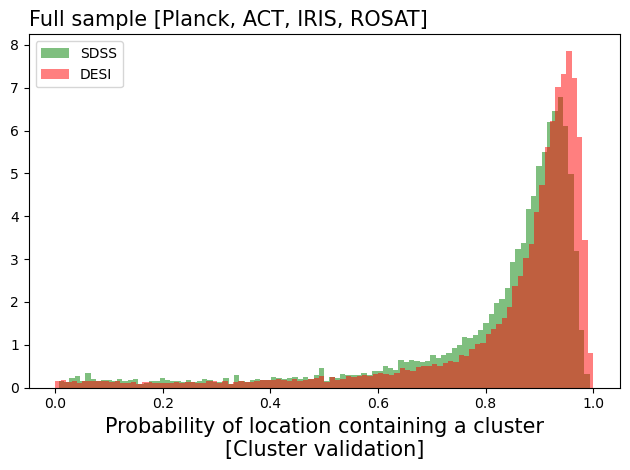

In [12]:
compare1 = pd.read_csv("output/Locations/C6_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C7_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.5, density = True, label = "SDSS")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.5, density = True, label = "DESI")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
print(len(compare1["clusterp"] > 0.8))
print(len(compare2["clusterp"] > 0.8))
print(len(compare3["clusterp"] > 0.8))

In [ ]:
# Making comparisons for the other redshift categories, and mass cuts

compare1 = pd.read_csv("output/Locations/C1_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/noncluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.3, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.3, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=150, color = "blue", alpha = 0.3, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

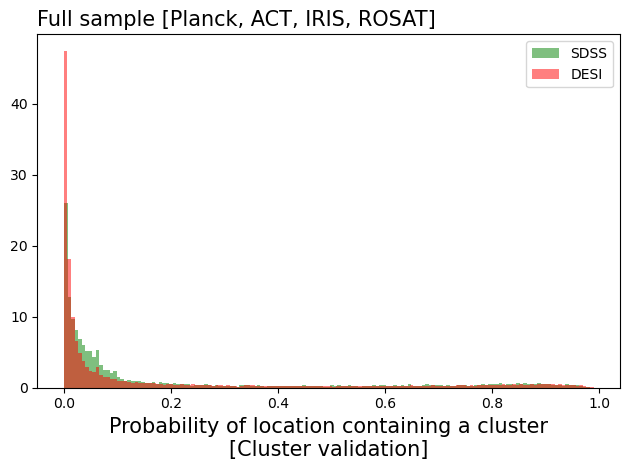

In [13]:
# Making comparisons for the other redshift categories, and mass cuts

compare1 = pd.read_csv("output/Locations/C6_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C7_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.5, density = True, label = "SDSS")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.5, density = True, label = "DESI")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

### Universal Reference ###

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/Q1_scan_fs.csv")
compare2 = pd.read_csv("output/Locations/C5_wA/Q1_scan_fs.csv")

In [ ]:
compare2

In [ ]:
# Cross-matching
# $0.6<z<1$, $z>1$, $0.05<z<0.6$

# Assuming locations (glat, glon) have not been switched up (same order as original dataframe)

plt.scatter(compare1["clusterp"], compare2["clusterp"], s = 1, alpha = 0.5)
plt.xlabel("Zou HSC $z>1$ Cluster Probability")
plt.ylabel("WH22 $z>1$ Cluster Probability")
plt.show()

# Sky Snapshots at a Location # 

## Planck ##

In [ ]:
glat = 0
glon = 0

c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
ra = c.icrs.ra.deg
dec = c.icrs.dec.deg

(ra, dec)

In [9]:
# For the 100 GHz frequency sample
awd = pd.read_csv("data/union3.csv", skiprows = 0)

pl100 = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl143 = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl217 = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl353 = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl545 = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl857 = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")

windowlen = 10
pl100[pl100<-1e23]=0
pl143[pl143<-1e23]=0
pl217[pl217<-1e23]=0
pl353[pl353<-1e23]=0
pl545[pl545<-1e23]=0
pl857[pl857<-1e23]=0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_pl = list()
map_pix_pl.append(reproject.enmap_from_healpix(pl100, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl143, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl217, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl353, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl545, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl857, shape = shape, wcs = wcs))

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


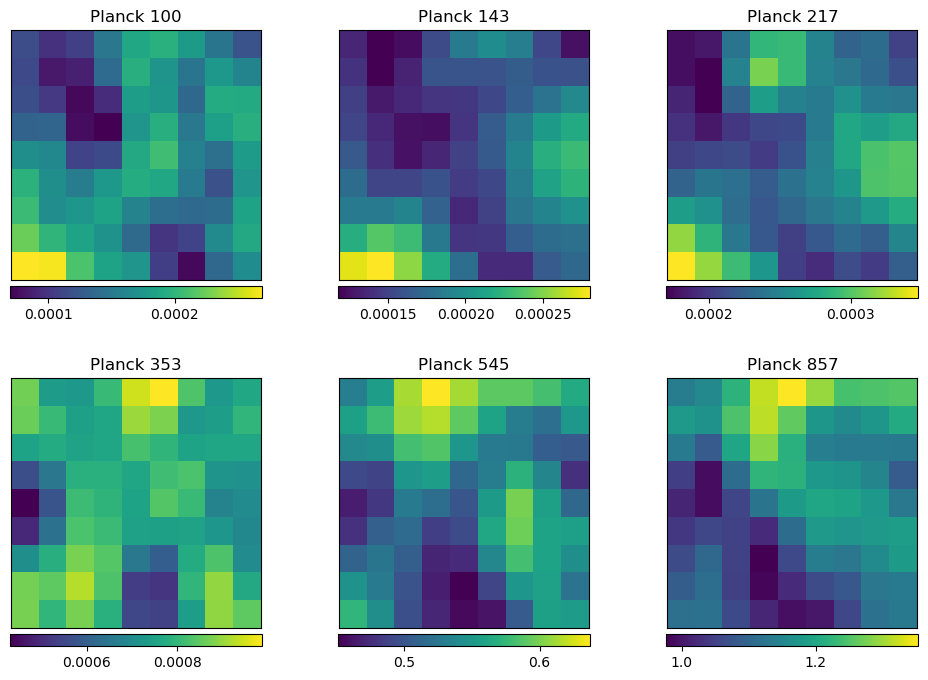

In [19]:
# Plotting Planck Images at all Planck Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 39.27028
dec = -38.87891

windowlen = 30
planck_map_freq = [100, 143, 217, 353, 545, 857]

fig, ax = plt.subplots(2, 3, figsize=(12,8))
j = 0
for i in range(len(map_pix_pl)):
    a = i
    stamp = reproject.thumbnails(map_pix_pl[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 3:
        a -= 3
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("Planck " + str(planck_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ACT ##

In [11]:
# For ACT frequency samples

act_90 = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
act_150 = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
act_220 = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")

windowlen = 1.8

map_pix_act = list()
map_pix_act.append(act_90)
map_pix_act.append(act_150)
map_pix_act.append(act_220)


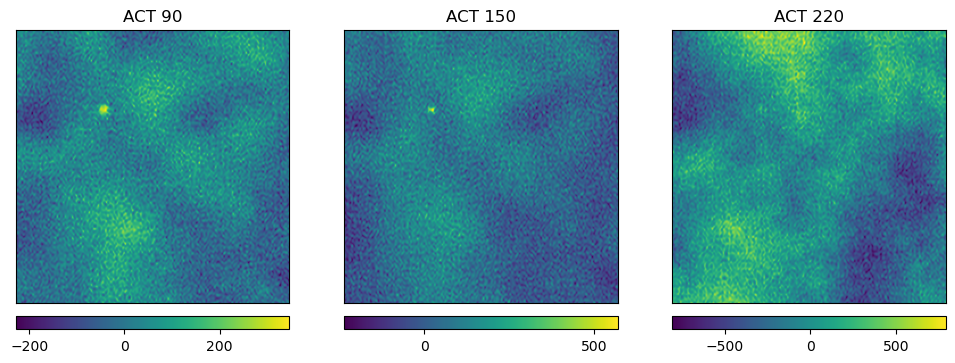

In [26]:
# Plotting ACT Images at all ACT Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 39.27028
dec = -38.87891

windowlen = 30
act_map_freq = [90, 150, 220]

fig, ax = plt.subplots(1, 3, figsize=(12,8))
for i in range(len(map_pix_act)):
    stamp = reproject.thumbnails(map_pix_act[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    f1 = ax[i].imshow(stamp[0]) 
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title("ACT " + str(act_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[i], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[i].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ROSAT ##

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix_ros = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

In [ ]:
# Plotting ROSAT Images around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30

fig, ax = plt.subplots(1, 1)
stamp = reproject.thumbnails(map_pix_ros, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
f1 = ax.imshow(stamp[0]) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("ROSAT")
c_bar = plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
c_bar.ax.locator_params(nbins=3)
scalebar = AnchoredSizeBar(ax.transData,
                          4.4, "", "center left",
                          pad = 0,
                          sep = 7,
                          color = "white",
                          frameon = False,
                          size_vertical = 0.02)
fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## IRIS ##

In [ ]:
# For IRIS frequency Samples (if we ever need it for some reason)

ir12 = hp.read_map("data/IRIS_nohole_1_2048_v2.fits")
ir25 = hp.read_map("data/IRIS_nohole_2_2048_v2.fits")
ir60 = hp.read_map("data/IRIS_nohole_3_2048_v2.fits")
ir100 = hp.read_map("data/IRIS_nohole_4_2048_v2.fits")

windowlen = 10
ir12[(ir12==-32768) | np.isnan(ir12)] = 0
ir25[(ir25==-32768) | np.isnan(ir25)] = 0
ir60[(ir60==-32768) | np.isnan(ir60)] = 0
ir100[(ir100==-32768) | np.isnan(ir100)] = 0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_ir = list()
map_pix_ir.append(reproject.enmap_from_healpix(ir12, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir25, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir60, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir100, shape = shape, wcs = wcs))

In [ ]:
# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30
iris_map_freq = [12, 25, 60, 100]

fig, ax = plt.subplots(2, 2, figsize=(8,8))
j = 0
for i in range(len(map_pix_ir)):
    a = i
    stamp = reproject.thumbnails(map_pix_ir[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 2:
        a -= 2
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("IRIS " + str(iris_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(hspace = 0.3)
plt.show()

### Universal Reference ###

In [ ]:
# font_path = "data/cmunrm.ttf"
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname = font_path)
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = prop.get_name()
# plt.rcParams["axes.unicode_minus"] = False

# 1. Different Training Sets
# 2. Viewing (next to each other)
# 3. Jiggling
# 4. Validation of catalogues

for i in range(len(awd.amf_ra.values)):
    dec = awd.amf_dec.values[i]
    ra = awd.amf_ra.values[i]
    
    # extract a set of thumbnail images centered on each set ofcoordinates 
    # (1 per for loop, in this case)
    stamp = reproject.thumbnails(map_pix, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    
    f, ax = plt.subplots(figsize = (5, 5))
    
    # Display image as 2D raster (Matplotlib)
    f1 = ax.imshow(stamp[0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax.transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
#     ax.add_artist(scalebar)
#     ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c= "white", fontsize = 18, transform = ax.transAxes)
    
#     ax.text(0.2, 0.7, "N={}".format(lens[i]), color = "white", fontsize = 20)
    # ax.text(0.2, 7.8, "ROSAT".format(lens[i]), color = "white", fontsize = 20)
    # plt.savefig("output/stackros.png")
    
    plt.show()
    
    

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

### ACT Map (Also in FastMap) ###

In [15]:
# Map full ACT map

# Change map to frequency needed:
# act_dr5.01_s08s18_AA_f090_daynight_map.fits
# act_dr5.01_s08s18_AA_f150_daynight_map.fits
# act_dr5.01_s08s18_AA_f220_daynight_map.fits

# Change index [0] to [1] or [2] for other ACT maps at same frequency.
# [0] - Temperature (Stokes I)
# [1] - Stokes Q
# [2] - Stokes U
act = enmap.read_map('data/act_dr5.01_s08s18_AA_f090_daynight_map.fits')[0]

# map_healpix = reproject.healpix_from_enmap(act, lmax = 6000, nside = 512)

# # remove coord = [] to get Celestial. Add coord = ["C", "G"] for galactic
# # ACT map comes in celestial. Must transform to G for galactic
# hp.mollview(map_healpix,norm='hist',cmap='Greys',title='Masked S/N map',cbar=True, coord = ["C", "G"])

# Plot results above it

# cluster_map = pd.read_csv("output/Locations/C1_wA/Q1_scan_fs.csv")
# hp.visufunc.projscatter(,,lonlat=True,c="r",s=100, vmin = 0, vmax = 1)


0.0

In [40]:
act.wcs

car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[21601.00,7561.00]}

In [ ]:
new_DF = pd.DataFrame(act)

In [ ]:
new_DF[(new_DF != None) & (new_DF != 0)] = 1
new_DF

In [43]:
act_mask = enmap.ndmap(new_DF, wcs = act.wcs)

In [ ]:
act_mask

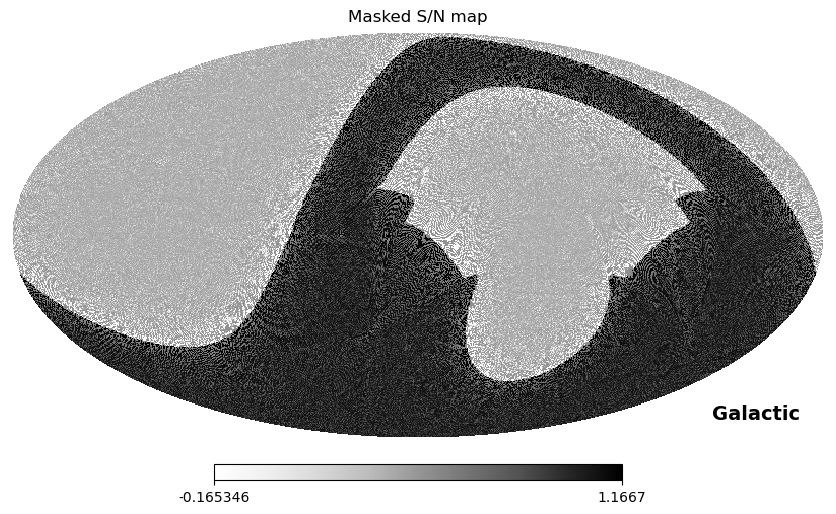

In [45]:
map_healpix = reproject.healpix_from_enmap(act_mask, lmax = 6000, nside = 512)
hp.mollview(map_healpix,norm='hist',cmap='Greys',title='Masked S/N map',cbar=True, coord = ["C", "G"])

## DES, WH22, DESI Intersections Results ##

In [21]:
# NOT Relevant code anymore

# Read in the intersections and change to redshift range
# des_wh22_AND_1.csv --> DES, WH22 Intersection, labelled with DES coordinates
# des_wh22_AND_4.csv --> DES, WH22 Intersection, labelled with WH22 coordinates
# des_wh22_desi_AND_1.csv --> DES, WH22, DESI Intersection, labelled with DES coordinates
# des_wh22_desi_AND_2.csv --> DES, WH22, DESI Intersection, labelled with DESI coordinates
# des_wh22_desi_AND_4.csv --> DES, WH22, DESI Intersection, labelled with WH22 coordinates
# KEEP IN MIND: DESI coordinates yield a smaller value with WH22 than with DES. Hence, "4" is shorter than "1" and "2"

# DES, WH22 only
dw1 = pd.read_csv("output/Locations/des_wh22_AND_1.csv", skiprows = 0)
dw1 = dw1[(dw1.z > 0.6) & (dw1.z < 1)].reset_index(drop = True)
dw2 = pd.read_csv("output/Locations/des_wh22_AND_4.csv", skiprows = 0)
dw2 = dw2[(dw2.z > 0.6) & (dw2.z < 1)].reset_index(drop = True)

# DES, DESI, and WH22
ddw1 = pd.read_csv("output/Locations/des_wh22_desi_AND_1.csv", skiprows = 0)
ddw1 = ddw1[(ddw1.z > 0.6) & (ddw1.z < 1)].reset_index(drop = True)
ddw2 = pd.read_csv("output/Locations/des_wh22_desi_AND_2.csv", skiprows = 0)
ddw2 = ddw2[(ddw2.z > 0.6) & (ddw2.z < 1)].reset_index(drop = True)

In [3]:
# Read in the graphs to compare (Cut 3 --> DESI, Cut 4 --> DES, Cut 5 --> WH22)
# Above cell not needed anymore.
# ALL with ACT

# number is axis. 1 is x, 2 is y

# DES_AND, WH22_AND, DES_XOR, WH22_XOR

intersection1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/AND_cluster_validation.csv", skiprows = 0)
intersection2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/AND_cluster_validation.csv", skiprows = 0)
xorDES_1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/xor1_cluster_validation.csv", skiprows = 0)
xorDES_2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/xor1_cluster_validation.csv", skiprows = 0)
xorWH22_1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/xor2_cluster_validation.csv",skiprows = 0)
xorWH22_2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/xor2_cluster_validation.csv",skiprows = 0)

In [4]:
# validation1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Old/DES_cluster_validation_of_WH22.csv", skiprows = 0)
# validation2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Old/WH22_cluster_validation_of_WH22.csv", skiprows = 0)

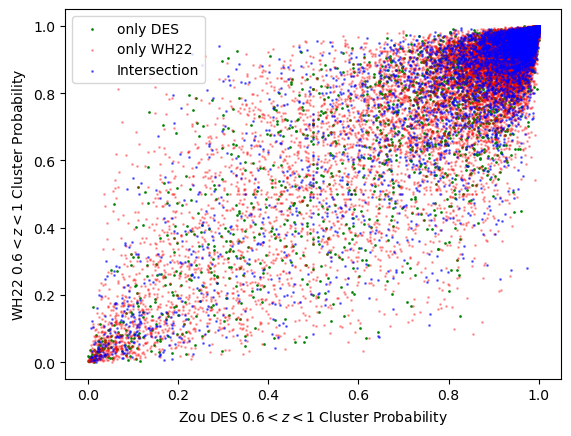

In [6]:
# Scatter Plot
# Look into if XOR is correct

plt.scatter(xorDES_1["clusterp"], xorDES_2["clusterp"], s = 1, alpha = 0.9, c = "green", label = "only DES")
plt.scatter(xorWH22_1["clusterp"], xorWH22_2["clusterp"], s = 1, alpha = 0.3, c = "red", label = "only WH22")
plt.scatter(intersection1["clusterp"], intersection2["clusterp"], s = 1, alpha = 0.5, c = "blue", label = "Intersection")

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

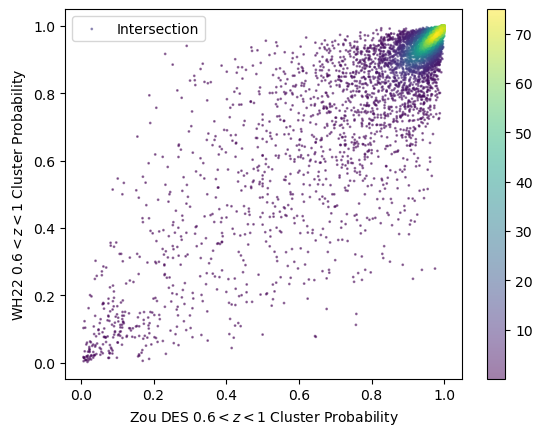

In [53]:
from scipy.stats import gaussian_kde

xy = np.vstack([intersection1["clusterp"],intersection2["clusterp"]])
z = gaussian_kde(xy)(xy)

scatter = plt.scatter(intersection1["clusterp"], intersection2["clusterp"], s = 1, alpha = 0.5, c = z, label = "Intersection")
plt.colorbar(scatter)

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

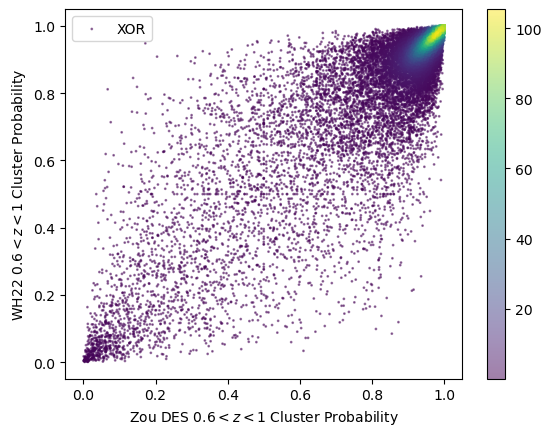

In [54]:
from scipy.stats import gaussian_kde

xor1 = pd.concat([xorDES_1["clusterp"], xorWH22_1["clusterp"]])
xor2 = pd.concat([xorDES_2["clusterp"], xorWH22_2["clusterp"]])

xy = np.vstack([xor1, xor2])
z = gaussian_kde(xy)(xy)

scatter = plt.scatter(xor1, xor2, s = 1, alpha = 0.5, c = z, label = "XOR")
plt.colorbar(scatter)

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

In [21]:
r1 = intersection1[(intersection1["clusterp"] > 0.9) & (intersection2["clusterp"] > 0.9)]
r1

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
2,46568,23.986460,5.100006,0.895251,85.620186,1,-56.023452,143.049898,0.000005,0.000026,...,-13.935879,13.390349,-63.029025,-0.000131,1.039794,1.498154,0.544513,2.876107,1,0.905715
3,46578,26.807189,4.942984,0.802607,76.685802,1,-55.209704,147.821693,0.000043,0.000099,...,24.623178,-14.719732,196.032405,0.000243,0.976176,1.281822,0.554879,3.650450,1,0.964579
4,46587,27.913383,5.134172,0.715573,116.080368,1,-54.606344,149.459774,0.000007,0.000019,...,-56.633501,-67.417225,210.201890,0.000179,0.976207,1.169387,0.549821,3.667923,1,0.977097
7,46620,35.356838,5.058750,0.823470,132.762191,1,-51.155150,160.354464,0.000054,0.000084,...,-7.890391,18.587942,-361.301132,-0.000076,0.842506,0.945218,0.197533,2.942628,1,0.946273
10,46689,4.940975,4.641307,0.855165,115.587106,1,-57.321596,108.198694,0.000100,0.000114,...,12.560984,-66.239491,53.917847,0.000302,1.084334,1.701425,0.508992,2.436864,1,0.976885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,128773,74.461602,-60.559390,0.832174,61.731768,1,-37.239435,270.036557,-0.000031,-0.000023,...,-31.558948,-105.449388,-391.926644,0.000480,0.606699,1.264663,0.688401,2.015231,1,0.964069
7433,129145,345.550535,-60.991610,0.739204,231.756879,1,-51.468552,323.857120,0.000033,0.000038,...,-9.643363,117.534657,-169.488318,0.000208,0.712557,1.490914,0.477438,1.931807,1,0.963005
7434,129169,349.017427,-60.600536,0.815675,108.835987,1,-52.832225,322.106127,-0.000139,-0.000131,...,20.289568,-125.260170,-128.490803,0.000475,0.735601,1.525243,0.504517,1.851396,1,0.979485
7435,129202,355.699508,-60.709737,0.827075,141.621082,1,-54.460749,317.310589,-0.000004,0.000011,...,-1.005909,9.870929,225.187594,0.000225,0.741122,1.516201,0.458238,1.504101,1,0.995028


In [22]:
r2= intersection2[(intersection1["clusterp"] > 0.9) & (intersection2["clusterp"] > 0.9)]
r2

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
2,735247,23.98204,5.08747,0.8880,43.31,4,-56.036734,143.049295,0.000005,0.000026,...,-13.688483,11.154474,-63.168899,-7.695978e-07,1.037406,1.497437,0.541773,2.873263,1,0.956641
3,739555,26.81205,4.95042,0.7218,19.00,4,-55.200993,147.824657,0.000043,0.000102,...,25.835184,-13.167457,192.420115,2.419740e-04,0.984135,1.290908,0.561010,3.663657,1,0.960124
4,741475,27.92176,5.14382,0.6445,38.78,4,-54.594167,149.466332,0.000006,0.000019,...,-58.418857,-68.041135,211.699944,1.553613e-04,0.976019,1.169780,0.547229,3.657238,1,0.959406
7,754804,35.35868,5.05670,0.8290,41.34,4,-51.155875,160.358695,0.000054,0.000085,...,-7.345802,19.172814,-365.485581,-7.947207e-05,0.843048,0.946156,0.196554,2.940095,1,0.960140
10,708235,4.95439,4.64934,0.8926,32.46,4,-57.316806,108.226187,0.000110,0.000122,...,13.490849,-65.526840,73.494936,2.652030e-04,1.083907,1.703347,0.500835,2.429866,1,0.969738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,805267,74.48270,-60.56868,0.7693,35.15,4,-37.227554,270.045670,-0.000032,-0.000022,...,-35.518513,-105.306485,-399.574174,4.973498e-04,0.607759,1.263846,0.687610,2.010728,1,0.970544
7433,845001,345.55054,-60.99161,0.7681,22.63,4,-51.468554,323.857117,0.000033,0.000038,...,-9.643368,117.534032,-169.490754,2.079583e-04,0.712557,1.490914,0.477438,1.931806,1,0.981983
7434,847130,349.01270,-60.60208,0.7775,24.16,4,-52.829603,322.107690,-0.000140,-0.000132,...,20.505718,-125.652801,-135.590274,4.789883e-04,0.735809,1.525010,0.504309,1.851192,1,0.912439
7435,851158,355.69995,-60.70332,0.8376,45.26,4,-54.466572,317.315245,-0.000004,0.000010,...,-1.898051,8.642446,228.999477,2.134416e-04,0.740938,1.516371,0.457918,1.503427,1,0.994134


In [25]:
r1 - r2

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
2,-688679,0.004420,0.012536,0.007251,42.310186,-3,0.013282,0.000603,-6.718787e-07,3.587992e-07,...,-0.247396,2.235875,0.139873,-1.299490e-04,2.387945e-03,7.168550e-04,2.739610e-03,2.844075e-03,0,-0.050926
3,-692977,-0.004861,-0.007436,0.080807,57.685802,-3,-0.008711,-0.002964,6.878679e-07,-3.367978e-06,...,-1.212006,-1.552275,3.612290,8.992756e-07,-7.958568e-03,-9.085700e-03,-6.130945e-03,-1.320701e-02,0,0.004455
4,-694888,-0.008377,-0.009648,0.071073,77.300368,-3,-0.012176,-0.006558,8.700795e-07,5.369885e-07,...,1.785356,0.623911,-1.498055,2.315449e-05,1.878512e-04,-3.923122e-04,2.592742e-03,1.068531e-02,0,0.017691
7,-708184,-0.001842,0.002050,-0.005530,91.422191,-3,0.000725,-0.004231,-5.743257e-07,-9.130706e-07,...,-0.544589,-0.584873,4.184448,3.479453e-06,-5.419354e-04,-9.379638e-04,9.790738e-04,2.533321e-03,0,-0.013867
10,-661546,-0.013415,-0.008033,-0.037435,83.127106,-3,-0.004790,-0.027492,-9.836441e-06,-8.078955e-06,...,-0.929865,-0.712650,-19.577089,3.728067e-05,4.268818e-04,-1.922229e-03,8.156891e-03,6.997992e-03,0,0.007147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,-676494,-0.021098,0.009290,0.062874,26.581768,-3,-0.011882,-0.009113,7.886232e-07,-5.405169e-07,...,3.959565,-0.142903,7.647530,-1.773441e-05,-1.060515e-03,8.165298e-04,7.908711e-04,4.502842e-03,0,-0.006475
7433,-715856,-0.000005,0.000000,-0.028896,209.126879,-3,0.000002,0.000003,-1.048430e-09,-9.016239e-10,...,0.000005,0.000625,0.002436,8.618421e-09,-8.272468e-08,-1.304757e-08,1.341211e-07,1.826994e-07,0,-0.018978
7434,-717961,0.004727,0.001544,0.038175,84.675987,-3,-0.002622,-0.001564,1.053042e-06,7.809259e-07,...,-0.216149,0.392631,7.099471,-3.601227e-06,-2.076895e-04,2.338908e-04,2.082752e-04,2.037117e-04,0,0.067046
7435,-721956,-0.000442,-0.006417,-0.010525,96.361082,-3,0.005823,-0.004656,3.692824e-07,4.722955e-07,...,0.892142,1.228483,-3.811883,1.110901e-05,1.831180e-04,-1.698119e-04,3.204400e-04,6.738211e-04,0,0.000894


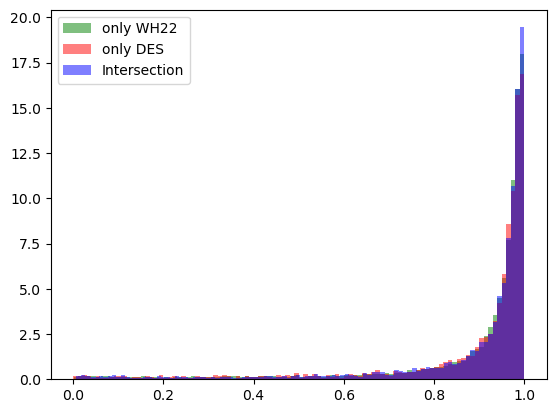

In [8]:
plt.hist(xorWH22_1["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "only WH22")
plt.hist(xorDES_1["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "only DES")
plt.hist(intersection1["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")



plt.legend()
plt.show()

In [20]:
x = len(intersection1[intersection1["clusterp"]< .2])
y = len(xorDES_1[xorDES_1["clusterp"]< .2])
z = len(xorWH22_1[xorWH22_1["clusterp"]< .2])

print(x/len(intersection1)*100.0)
print((z+y)/(len(xorDES_1)+len(xorWH22_1)) *100.0)
# print(z/len(xorDES_1) *100.0)

2.8506118058356864
3.001968503937008


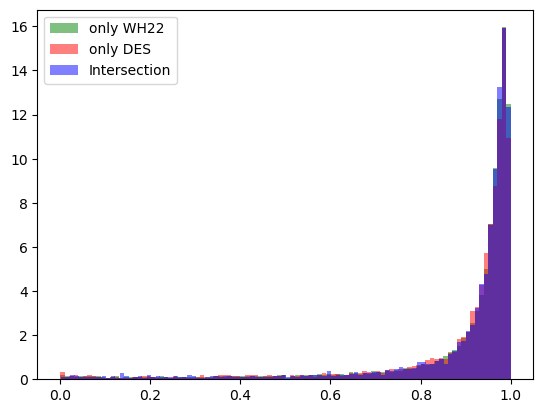

In [11]:
plt.hist(xorWH22_2["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "only WH22")
plt.hist(xorDES_2["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "only DES")
plt.hist(intersection2["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")

plt.legend()
plt.show()

In [16]:
intersection1[(intersection1["clusterp"] > 0.96) & (intersection2["clusterp"] > 0.96)]

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
3,46578,26.807189,4.942984,0.802607,76.685802,1,-55.209704,147.821693,0.000043,0.000099,...,24.623178,-14.719732,196.032405,0.000243,0.976176,1.281822,0.554879,3.650450,1,0.964579
10,46689,4.940975,4.641307,0.855165,115.587106,1,-57.321596,108.198694,0.000100,0.000114,...,12.560984,-66.239491,53.917847,0.000302,1.084334,1.701425,0.508992,2.436864,1,0.976885
16,46781,13.374336,4.681146,0.870555,91.027037,1,-58.186709,123.905378,-0.000126,-0.000093,...,-43.217783,-88.830112,-35.635910,0.000221,1.038169,1.797033,0.319394,2.462383,1,0.972437
28,46914,27.714820,4.987153,0.811807,69.739202,1,-54.819879,149.246788,0.000043,0.000079,...,-17.403414,-16.864460,181.931718,0.000242,0.986991,1.217279,0.588111,3.803574,1,0.969622
53,47211,6.995321,4.582621,0.734873,183.839288,1,-57.786640,111.917866,0.000006,0.000034,...,-2.441130,-14.078676,-132.436288,0.000267,1.007808,1.722651,0.310470,2.223393,1,0.978605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,128758,73.098625,-60.897355,0.928496,90.298753,1,-37.827300,270.618193,0.000056,0.000069,...,-2.936371,57.669955,-105.705477,0.000442,0.574239,1.267435,0.719592,2.173495,1,0.989903
7427,128773,74.461602,-60.559390,0.832174,61.731768,1,-37.239435,270.036557,-0.000031,-0.000023,...,-31.558948,-105.449388,-391.926644,0.000480,0.606699,1.264663,0.688401,2.015231,1,0.964069
7433,129145,345.550535,-60.991610,0.739204,231.756879,1,-51.468552,323.857120,0.000033,0.000038,...,-9.643363,117.534657,-169.488318,0.000208,0.712557,1.490914,0.477438,1.931807,1,0.963005
7435,129202,355.699508,-60.709737,0.827075,141.621082,1,-54.460749,317.310589,-0.000004,0.000011,...,-1.005909,9.870929,225.187594,0.000225,0.741122,1.516201,0.458238,1.504101,1,0.995028


In [8]:
len(np.linspace(-15,-90,224))

224

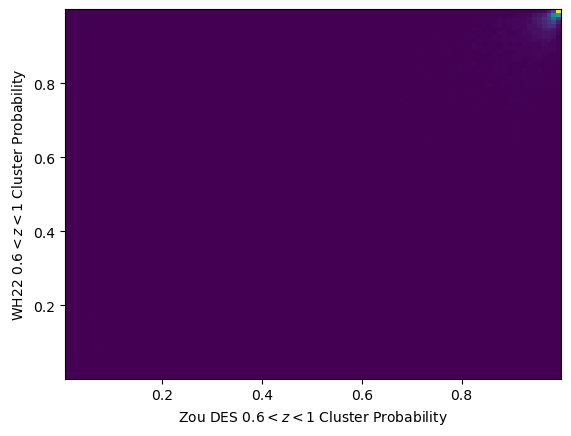

In [26]:
# 2D Histogram - Intersection

plt.hist2d(intersection1["clusterp"], intersection2["clusterp"],bins = (100,100))
plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.show()

## Some Samples ##

In [ ]:
awd = pd.read_csv("data/union3.csv", skiprows= 0)
awd

In [ ]:
# Catalogue 0 - AMF

awd0 = awd[awd["cat"] == 0]
fig = plt.hist2d(awd0["z"], awd0["rh"])
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 1 - Zou DES

awd1 = awd[awd["cat"] == 1]
fig = plt.hist2d(awd1["z"], awd1["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 2 - Zou DESI

awd2 = awd[awd["cat"] == 2]
fig = plt.hist2d(awd2["z"], awd2["rh"], bins = (100, 100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 3 - Zou HSC

awd3 = awd[awd["cat"] == 3]
fig = plt.hist2d(awd3["z"], awd3["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Restrict richness to 1.5

# Richness is NOT the same thing across catalogues

# Title
# Integrated signal abov

In [ ]:
# Catalogue 4 - WH22

awd4 = awd[awd["cat"] == 4]
fig = plt.hist2d(awd4["z"], awd4["rh"])
plt.colorbar()
plt.show()

In [ ]:
# All Catalogues

fig = plt.hist2d(awd["z"], awd["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Zou Catalogues only (1,2,3)

awd_Zou = awd[(awd["cat"] == 1) | (awd["cat"] == 2) | (awd["cat"] == 3)]
fig = plt.hist2d(awd_Zou["z"], awd_Zou["rh"], bins = (100,100))
plt.colorbar()
plt.show()

## Trying to Manually Find Cumulative Distribution Function - WH22

In [ ]:
catalogue = 0
z_lb = 0
z_hb = 5
rh_lb = 0
rh_hb = 50
bin_num = 20

cat_names = ["AMF", "Zou DES", "Zou DESI", "Zou HSC", "WH22"]

awd_cat = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]
plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")

plt.suptitle(cat_names[catalogue] + " Non-integrated Distribution", fontsize = 16)
plt.colorbar()
plt.show()

In [ ]:
# Understanding the "Integrated" code:

# Histdata is an array storing the histogram value (color) at each coordinate.
# xbins and ybins keep track of the bin edges along the axes
# mesh is irrelevant here
# Change number of bins here

hist_data, xbins, ybins, mesh = plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))

# Integrate this histogram data. 
# Pandas cumsum (different from np cumsum - look it up) over the data. axis = 0 is adding each row to the next one.
hist_data = hist_data.cumsum(axis = 0).cumsum(axis = 1)

# Matplotlib pcolormesh is used to plot a color map
plt.pcolormesh(xbins, ybins, hist_data)
plt.suptitle(cat_names[catalogue] + " Integrated Distribution", fontsize = 16)
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")
plt.colorbar()
plt.show()

In [ ]:
# Lookup for objects in certain range:

catalogue = 3
z_lb = 1
z_hb = 5
rh_lb = 0
rh_hb = 500

awd_check = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]

print("Size: " + str(len(awd_check)))

In [ ]:
# Using to find for other catalogues:

# Insert here

# How to find intersections? It seems like the union3 file, etc. was
# made such that duplicates from one catalogue were dropped?? idk

## Failed Attempts

In [ ]:
# Another Failed Attempt

# awd_WH22_int = awd_WH22.sort_values(by = "z")
# awd_WH22_int["z_cum"] = np.cumsum(awd_WH22_int["z"], axis = 0)
# awd_WH22_int["rh_cum"] = np.cumsum(awd_WH22_int["rh"], axis = 0)

# fig = plt.hist2d(awd_WH22_int["z_cum"], awd_WH22_int["rh_cum"], bins = (20,20))
# plt.suptitle("WH22 Integrated Distribution", fontsize = 16)
# plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)

# plt.colorbar()
# plt.show()